## Exploration A
The company who supplied the Products data in the lecture notes also want an investigation into their website. As last week, the data (https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv) shows the number of page hits per day.
As in the lecture examples the company wants to explore correlations between page hits over the year. In <a href="file:///Users/abume/OneDrive - University of Greenwich/Term2/Data_Visualisation/Lecture02_proportion">tutorial 02</a> you should have identified the high volume and medium volume pages, with the low volume being all the others. It was your choice how high, medium and low were defined, but for the purposes of this exploration pick the top 2 as high volume and the next 8 as medium volume (this is very likely to be the choice you made originally).

1.	[Create a scatter plot of the two high volume pages against each other.](#1-create-a-scatter-plot-of-the-two-high-volume) Can you detect any correlation visually?

2.	[Create a single visualisation showing scatter subplots for all pairs of medium volume pages](#2-create-a-single-visualisation-showing-scatter-subplots-for-all-pairs-of-medium-volume) against each other. Which two pages are most strongly correlated with each other? Which other pages seem to have some correlation, visually?

3.	[Now confirm your findings by creating a heatmap](#3-now-confirm-your-findings) showing the correlations between all the high and medium volume pages. Comment on the strongest positive and inverse correlations.

4.	[After seeing the heatmap, the company has decided it is interested in all positive correlations where the Pearson coefficient is greater than 0.5.](#4-after-seeing-the-heatmap-the-company-has-decided-it-is-interested-in-all-positive-correlations-where-the-pearson-coefficient-is-greater-than-05) Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of pages.

5.	[Now draw line plots with trendlines](#5-now-draw-line-plots-with-trendlines) for the positively correlated pages you selected above.

6.	[The company is also interested in all inverse correlations where the Pearson coefficient is less than –0.55](#6-the-company-is-also-interested-in-all-inverse-correlations-where-the-pearson-coefficient-is-less-than-–055). Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of pages.

7.	Now draw line plots with trendlines for the inversely correlated pages you selected above.

Your visualisations for items 4 and 7 should look something like those below.


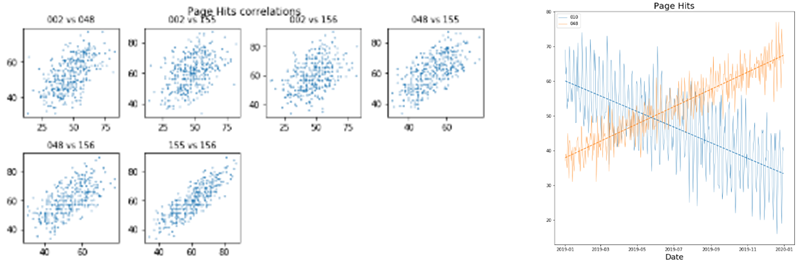


 


In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


In [2]:
# Load the data with pandas and store in `data`

data = pd.read_csv("https://tinyurl.com/ChrisCoDV/Products/DailySales.csv", index_col=0)
data.index = pd.to_datetime(data.index)
data.head()

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,526,3,9,0,66,472,260,116,45,202,...,85,38,0,97,19,7,0,174,55,12
2019-01-02,504,11,10,0,57,472,157,108,3,223,...,73,0,0,92,45,0,14,132,65,8
2019-01-03,499,0,10,0,42,475,154,104,0,199,...,65,20,5,84,89,0,4,132,39,6
2019-01-04,504,0,7,0,57,464,149,83,17,198,...,83,19,0,89,0,0,14,143,57,20
2019-01-05,499,15,9,0,31,466,159,84,14,219,...,97,31,0,104,0,8,28,46,44,15


In [3]:
# Checking for high volume sales using sum() and sorting
data.sum().sort_values(ascending=False)

F    176462
A    175173
L    141115
J     63273
W     53517
H     51118
S     46225
G     45193
P     29187
M     25577
O     25573
T     20944
D     18672
E     17449
X     15809
Q      6272
N      6011
Y      5468
V      5330
I      5249
B      4489
C      3649
K      3346
U      3069
R      2457
dtype: int64

In [4]:
# Split data into high, mid and low volumes sales
temp_data = data.transpose()
high_sales = temp_data.loc[data.sum() >= 150000].transpose()
medium_sales = temp_data.loc[(data.sum() < 150000) & (data.sum() > 25573)].transpose()
low_sales = temp_data.loc[data.sum() <= 25573].transpose()

In [5]:
# high_sales =data.columns[data.sum() >= 150000]
# medium_sales = data.columns[(data.sum() < 150000) & (data.sum() > 25573)]
# low_sales = data.columns[data.sum() <= 25573]

### 1.	Create a scatter plot of the two high volume

pages against each other. Can you detect any correlation visually?

In [6]:
high_sales.head()

,A,F
Date,,
2019-01-01,526,472
2019-01-02,504,472
2019-01-03,499,475
2019-01-04,504,464
2019-01-05,499,466


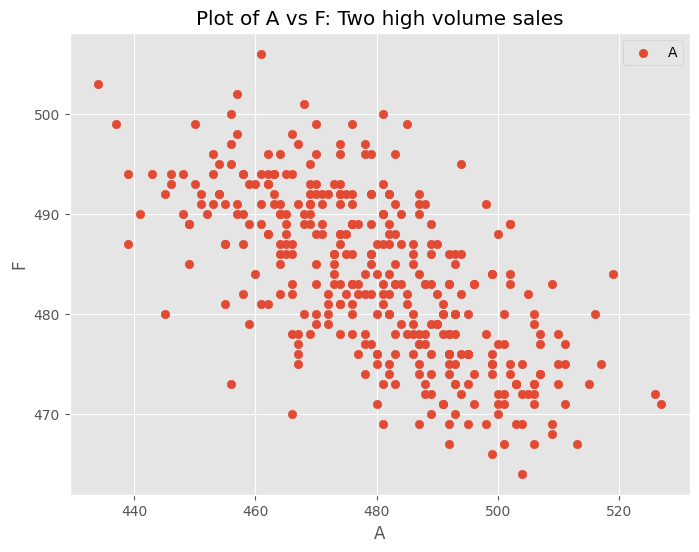

In [7]:
# 1.	Create a scatter plot of the two high volume pages against each other. Can you detect any correlation visually?

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(high_sales["A"], high_sales["F"])
ax.set(title=f"Plot of {high_sales.columns[0]} vs {high_sales.columns[1]}: Two high volume sales",
       xlabel=f"{high_sales.columns[0]}",
       ylabel=f"{high_sales.columns[1]}")
plt.legend(high_sales.columns)
plt.show()

### 2.	Create a single visualisation showing scatter subplots for all pairs of medium volume

 pages against each other. Which two pages are most strongly correlated with each other? Which other pages seem to have some correlation, visually?

In [ ]:
medium_sales.head()

In [ ]:
# 2.	Create a single visualisation showing scatter subplots for all pairs of medium volume
# pages against each other. Which two pages are most strongly correlated with each other? 
# Which other pages seem to have some correlation, visually?
selected = medium_sales.columns.values #['G', 'H', 'J', 'L', 'M', 'P', 'S', 'W']#medium_sales.columns.values
fig = plt.figure(figsize=(12,12))
fig.suptitle("Medium Sales Correlation", fontsize=20)
index = 1

for i, name_i in enumerate(selected):
    for j in range(i+1, len(selected)):
        name_j = selected[j]
        ax = fig.add_subplot(5, 6, index)
        ax.set_title(name_i + " vs " + name_j, fontsize=11)
        ax.scatter(medium_sales[name_i], medium_sales[name_j])
        index += 1

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.tight_layout()
# plt.show()



### 3.	Now confirm your findings
 by creating a heatmap showing the correlations between all the high and medium volume pages. Comment on the strongest positive and inverse correlations.

Create a correlation function

In [27]:
# 3.	Now confirm your findings by creating a heatmap showing the correlations between all the high
# and medium volume pages. Comment on the strongest positive and inverse correlations.
def plot_correlation_heatmap(data, n=6):
    plt.figure(figsize=(n+1,n))
    corr = data.corr()
    ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, annot_kws={"size": 8}, cmap=sns.diverging_palette(255, 10, n=10), robust=True)
    ax.set_xticklabels(ax.get_xticklabels())
    plt.show()

#### 4.1 Corrlation of medium volumes

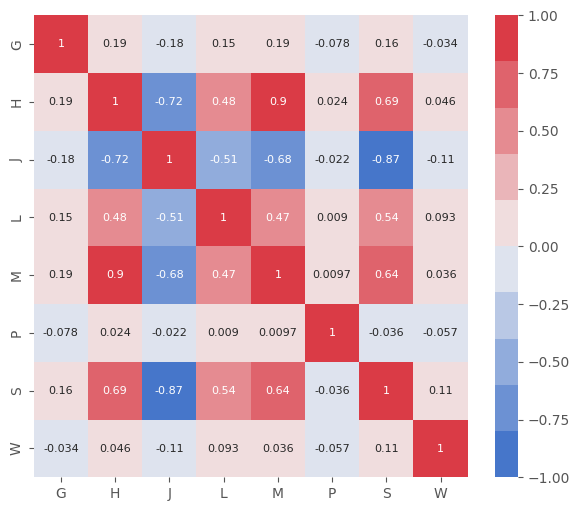

In [28]:
plot_correlation_heatmap(medium_sales)

#### 4.1.1 Comments on Medium Volumes
From the heatmap, the following can be observed:
- strong positive correlations (> 0.5) between the product pairs: (H,S), (M, S), (L, S), (H, M).
    - This could mean that volume `"S"` is a product on which sales "M", "H" and "L" depend.
- strong negative correlations (< -0.5) between volume pairs: (H,J), (J,L), (J,M), (J,S).
    - The hypothesis here is that product `"J"` is a determiner for products "H", "L", "M" sales.

The conclusion here is that product "S" marketing should be focused on while product "J" can be made silent.

#### 4.2 Correlation heatmap for high volumes

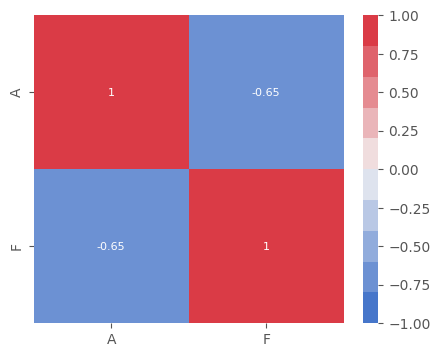

In [30]:
plot_correlation_heatmap(high_sales, n=4)

### 4.2.1 Comment on High Volumes A, F:
There is a strong inverse correlation by volumes A and F.

### 4.2.2 Scatter Plots for high volumes Correlations

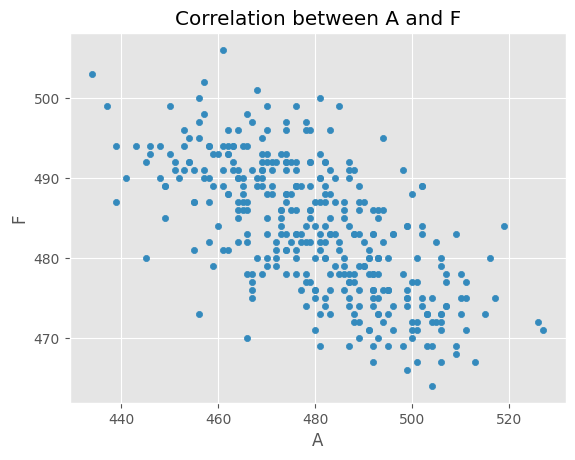

In [39]:
# Scatter plots for High Volumes correlation

high_sales.plot.scatter("A", "F");
plt.title("Correlation between A and F")
plt.xlabel("A")
plt.ylabel("F")
plt.show()


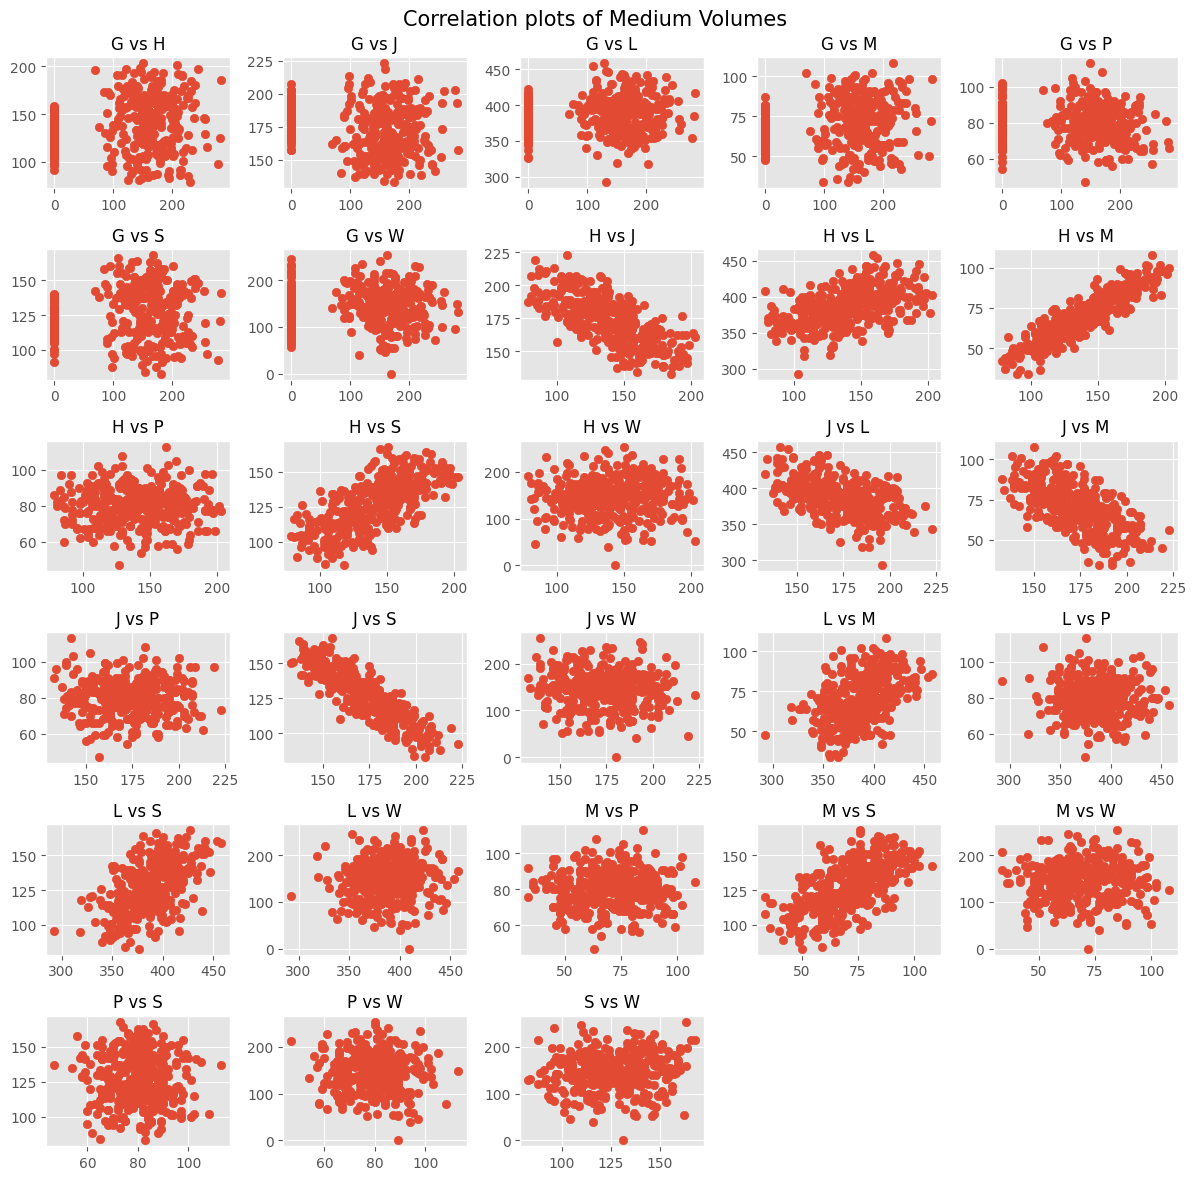

In [50]:
# Scatter plots for medium_sales

fig = plt.figure(figsize=(12,12))
fig.suptitle("Correlation plots of Medium Volumes", fontsize=15)
columns = medium_sales.columns.values
index = 1
for i, name_i in enumerate(columns):
    for j in range(i+1, len(columns)):
        name_j = columns[j]
        sub = fig.add_subplot(6, 5, index)
        sub.scatter(medium_sales[name_i], medium_sales[name_j])
        sub.set_title(f"{name_i} vs {name_j}", fontsize=12)
        # sub.set_xticklabels(sub.get_xticklabels)
        index += 1

plt.tight_layout()
plt.show()        

array(['G', 'H', 'J', 'L', 'M', 'P', 'S', 'W'], dtype=object)

### 4.	After seeing the heatmap, the company has decided it is interested in all positive correlations where the Pearson coefficient is greater than 0.5.
Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of pages.

In [57]:
corr = medium_sales.corr()
keep = corr.where(np.triu(np.ones(corr.shape), k=1).astype("bool")) # k=0 (main diagonal), k=1(Diagonal above), k=-1(diagonal below)

threshold = .5
pairs_above_threshold = {}
temp_corr = keep.values

for i in range(len(temp_corr)):
    for j in range(len(temp_corr)):
        if (temp_corr[i,j] > threshold) and (i != j):
            pairs_above_threshold[f"{corr.columns[i]}, {corr.columns[j]}"] = [temp_corr[i,j]]

pairs_above_threshold

{'H, M': [0.8993492947405182],
 'H, S': [0.6928067163847235],
 'L, S': [0.5351062582003179],
 'M, S': [0.6383798422855761]}

H M
H S
L S
M S


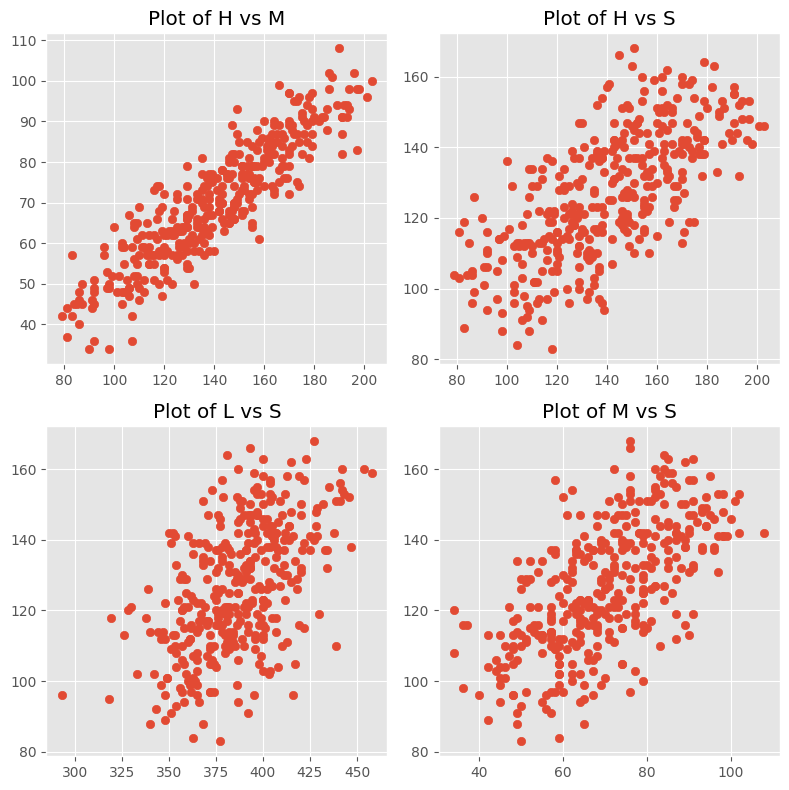

In [109]:
fig = plt.figure(figsize=(8,8))
index = 1
for product in pairs_above_threshold.keys():
    x = medium_sales[product[0]]
    y = medium_sales[product[3]]
    ax = fig.add_subplot(2,2,index)
    ax.scatter(x, y)
    print(product[0], product[3])
    ax.set_title(f"Plot of {product[0]} vs {product[3]}")
    index += 1

    # ax.get_xticklabels(ax.get_xticklabels)
plt.tight_layout()
plt.show()

### 5.	Now draw line plots with trendlines

for the positively correlated pages you selected above.

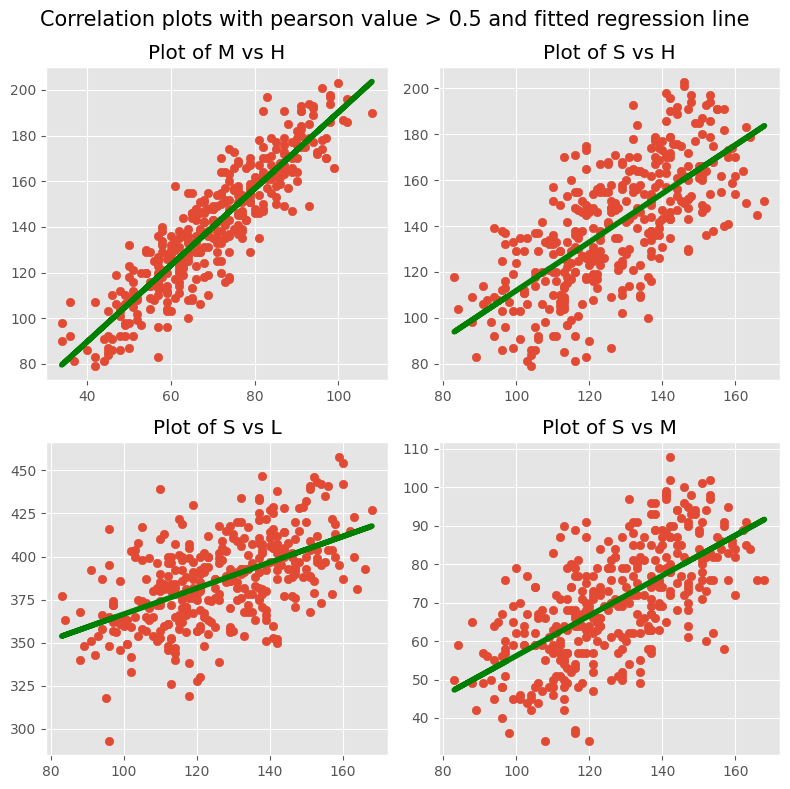

In [16]:
fig = plt.figure(figsize=(8,8))
index = 1
for product in pairs_above_threshold.keys():
    x = medium_sales[product[0]]
    y = medium_sales[product[3]]
    ax = fig.add_subplot(2,2,index)
    ax.scatter(x, y)
    z = np.polyfit(x, y, 1)
    trend = np.poly1d(z)
    plt.plot(x, trend(x), "g-", linewidth=4)
    ax.set_title(f"Plot of {product[0]} vs {product[3]}")
    index += 1
    ax.get_xticklabels(ax.get_xticklabels)

plt.suptitle("Correlation plots with pearson value > 0.5 and fitted regression line", fontsize=15)
plt.tight_layout()
plt.show()

### 6.	The company is also interested in all inverse correlations where the Pearson coefficient is less than –0.55.

Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of pages.

### Correllation plot for high_sales for is shown in [Part 4.2.2](#422-scatter-plots-for-high-volumes-correlations) above

Negative correalatons of medium sales with Pearson Coefficients less than `-0.55`

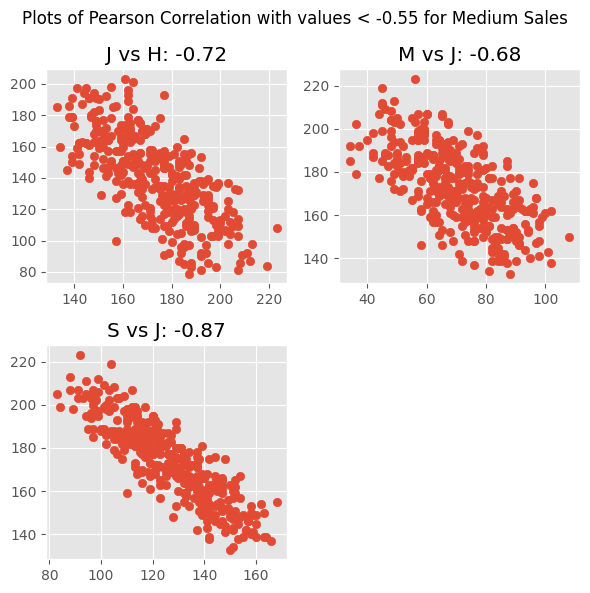

In [124]:
below_neg_55 = corr.where(np.tril(np.ones(corr.shape), k=-1).astype("bool"))

midi_dict = {}
matrix = below_neg_55.values
header = below_neg_55.columns.values

for i in range(len(header)):
    for j in range(len(header)):
        if matrix[i,j] < -0.55:
            midi_dict[(corr.columns[i], corr.columns[j])] = [matrix[i,j]]
# midi_dict

# Plot Selected pairs correlation
fig = plt.figure(figsize=(6,6))
fig.suptitle("Plots of Pearson Correlation with values < -0.55 for Medium Sales")
index = 1

for volumes in midi_dict.keys():
    x = medium_sales[volumes[0]]
    y = medium_sales[volumes[1]]
    ax = fig.add_subplot(2, 2, index)
    ax.scatter(x, y)
    ax.set(title=f"{volumes[0]} vs {volumes[1]}: {midi_dict[volumes][0]:.2f}")
    index += 1
plt.tight_layout()
plt.show()

### 7.	Now draw line plots with trendlines for the inversely correlated pages you selected above.

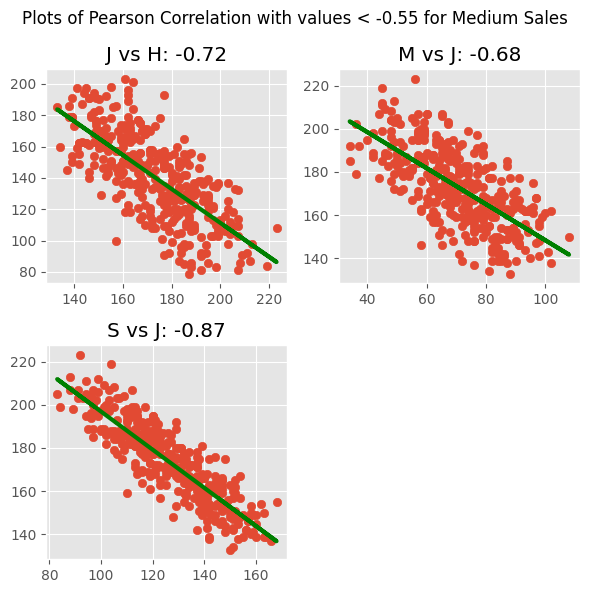

In [128]:
below_neg_55 = corr.where(np.tril(np.ones(corr.shape), k=-1).astype("bool"))

midi_dict = {}
matrix = below_neg_55.values
header = below_neg_55.columns.values

for i in range(len(header)):
    for j in range(len(header)):
        if matrix[i,j] < -0.55:
            midi_dict[(corr.columns[i], corr.columns[j])] = [matrix[i,j]]
# midi_dict

# Plot Selected pairs correlation
fig = plt.figure(figsize=(6,6))
fig.suptitle("Plots of Pearson Correlation with values < -0.55 for Medium Sales")
index = 1

for volumes in midi_dict.keys():
    x = medium_sales[volumes[0]]
    y = medium_sales[volumes[1]]
    ax = fig.add_subplot(2, 2, index)
    ax.scatter(x, y)
    z = np.polyfit(x, y, deg=1)
    trend = np.poly1d(z)
    plt.plot(x, trend(x), "g-", linewidth=3)
    ax.set(title=f"{volumes[0]} vs {volumes[1]}: {midi_dict[volumes][0]:.2f}")
    index += 1
plt.tight_layout()
plt.show()